In [98]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg
from sklearn import linear_model 
sns.set(color_codes =True)
%matplotlib inline

In [6]:
#importing dataset and viewing it
diabetes = pd.read_csv('C:/Users/crook/diabetes (2).csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
#Renaming column to DPF
diabetes.DiabetesPedigreeFunction = diabetes.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1

In [8]:
#Replacing 0s with NaN
diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [9]:
#Replacing missing data with either means or medians of repsective categories
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(),inplace=True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(),inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(),inplace=True)
diabetes['BMI'].fillna(diabetes['BMI'].median(),inplace=True)

In [10]:
#Viewing the data set again after cleaning
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0           72.0           35.0    125.0  33.6  0.627   
1            1     85.0           66.0           29.0    125.0  26.6  0.351   
2            8    183.0           64.0           29.0    125.0  23.3  0.672   
3            1     89.0           66.0           23.0     94.0  28.1  0.167   
4            0    137.0           40.0           35.0    168.0  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1

In [11]:
#Describing Data
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.455208    0.471876   33.240885    0.348958  
std      6.875177    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000    0.000000  
50%     32.300000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [12]:
#Showing Means of each outcome for every category
diabetes.groupby(["Outcome"]).mean() 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.710121      70.935397      27.726000  127.792000   
1           4.865672  142.165573      75.147324      31.686567  164.701493   

               BMI       DPF        Age  
Outcome                                  
0        30.885600  0.429734  31.190000  
1        35.383582  0.550500  37.067164

In [40]:
#Describing data for just outcome 0
diabetes[diabetes.Outcome==0].describe().T

count        mean        std     min       25%      50%  \
Pregnancies    500.0    3.298000   3.017185   0.000   1.00000    2.000   
Glucose        500.0  110.710121  24.717060  44.000  93.00000  107.500   
BloodPressure  500.0   70.935397  11.931033  24.000  63.50000   72.000   
SkinThickness  500.0   27.726000   8.552966   7.000  22.00000   29.000   
Insulin        500.0  127.792000  74.447469  15.000  95.00000  125.000   
BMI            500.0   30.885600   6.504128  18.200  25.75000   30.400   
DPF            500.0    0.429734   0.299085   0.078   0.22975    0.336   
Age            500.0   31.190000  11.667655  21.000  23.00000   27.000   
Outcome        500.0    0.000000   0.000000   0.000   0.00000    0.000   

                     75%      max  
Pregnancies      5.00000   13.000  
Glucose        125.00000  197.000  
BloodPressure   78.00000  122.000  
SkinThickness   31.00000   60.000  
Insulin        125.00000  744.000  
BMI             35.30000   57.300  
DPF              0.56175    2.329  
Age             37.00000   81.000  
Outcome          0.00000    0.000

In [39]:
#Describing data for just outcome 1
diabetes[diabetes.Outcome==1].describe().T

count        mean         std     min       25%      50%  \
Pregnancies    268.0    4.865672    3.741239   0.000    1.7500    4.000   
Glucose        268.0  142.165573   29.541750  78.000  119.0000  140.000   
BloodPressure  268.0   75.147324   11.945712  30.000   68.0000   74.000   
SkinThickness  268.0   31.686567    8.662994   7.000   29.0000   29.000   
Insulin        268.0  164.701493  100.932249  14.000  125.0000  125.000   
BMI            268.0   35.383582    6.595603  22.900   30.9000   34.250   
DPF            268.0    0.550500    0.372354   0.088    0.2625    0.449   
Age            268.0   37.067164   10.968254  21.000   28.0000   36.000   
Outcome        268.0    1.000000    0.000000   1.000    1.0000    1.000   

                   75%     max  
Pregnancies      8.000   17.00  
Glucose        167.000  199.00  
BloodPressure   82.000  114.00  
SkinThickness   36.000   99.00  
Insulin        167.250  846.00  
BMI             38.775   67.10  
DPF              0.728    2.42  
Age             44.000   70.00  
Outcome          1.000    1.00

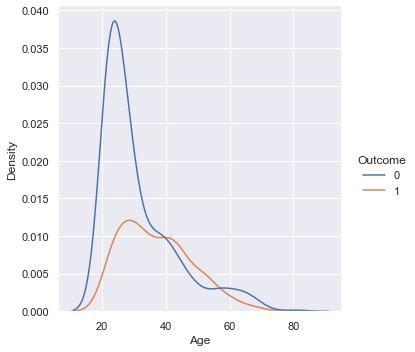

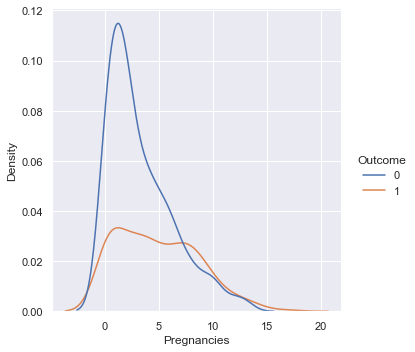

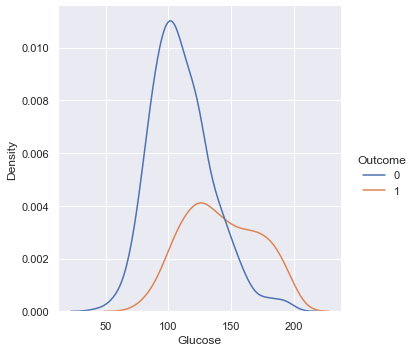

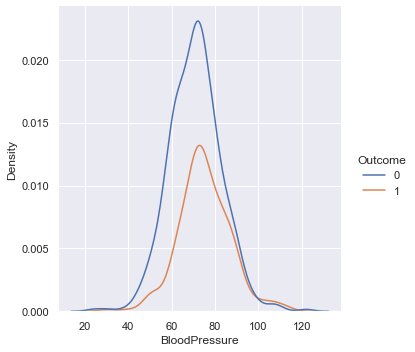

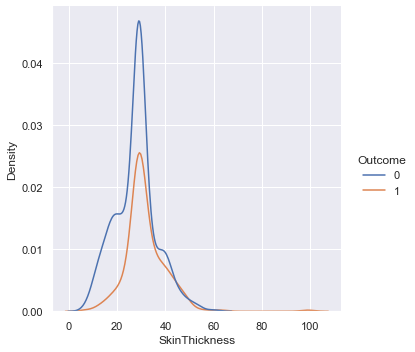

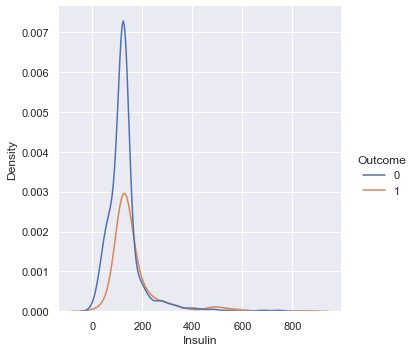

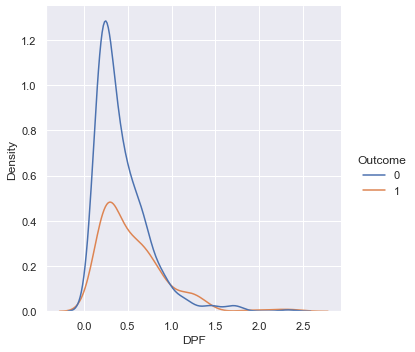

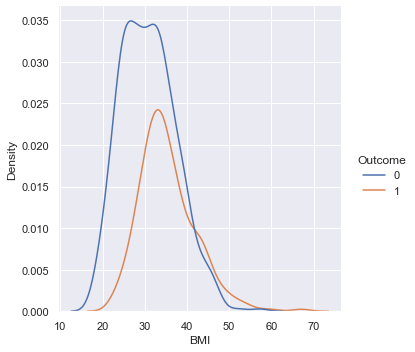

In [15]:
#Creating histogram plots to compare between outcome 0 and 1 for each category
sns.displot(data=diabetes, x="Age", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="Pregnancies", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="Glucose", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="BloodPressure", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="SkinThickness", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="Insulin", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="DPF", hue="Outcome", kind="kde")
sns.displot(data=diabetes, x="BMI", hue="Outcome", kind="kde")

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

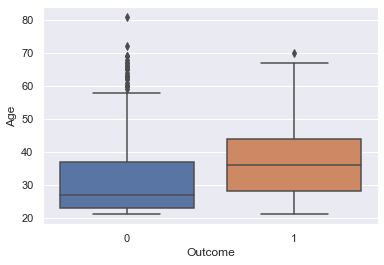

In [16]:
#Creating boxplots for each category between each outcome
sns.boxplot(x="Outcome", y="Age", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

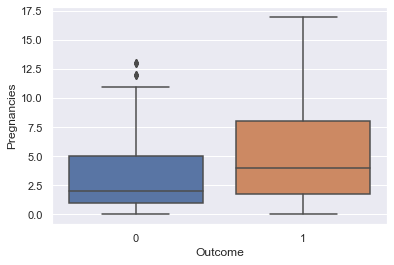

In [17]:
sns.boxplot(x="Outcome", y="Pregnancies", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

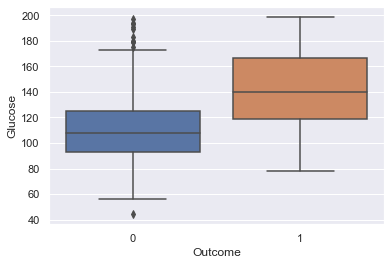

In [18]:
sns.boxplot(x="Outcome", y="Glucose", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

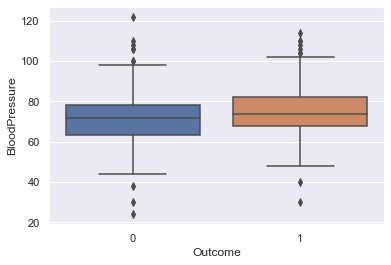

In [19]:
sns.boxplot(x="Outcome", y="BloodPressure", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

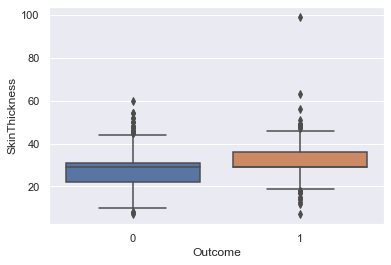

In [20]:
sns.boxplot(x="Outcome", y="SkinThickness", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

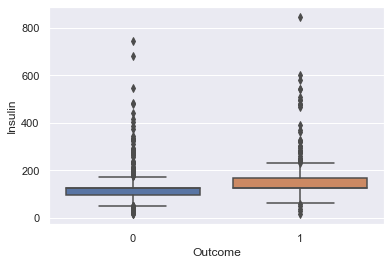

In [21]:
sns.boxplot(x="Outcome", y="Insulin", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='DPF'>

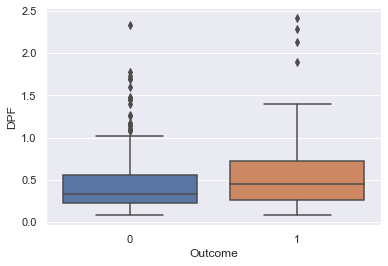

In [22]:
sns.boxplot(x="Outcome", y="DPF", data=diabetes)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

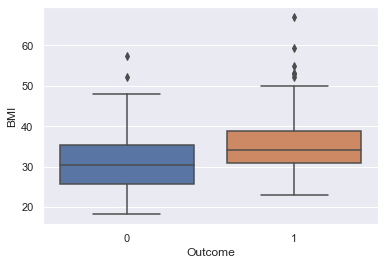

In [23]:
sns.boxplot(x="Outcome", y="BMI", data=diabetes)

In [44]:
#Creating T-tests for specific combinations of data sets
stats.levene(diabetes.BMI[diabetes.Outcome==1], diabetes.BMI[diabetes.Outcome==0])

LeveneResult(statistic=1.3668461604500781, pvalue=0.2427181790711925)

In [45]:
pg.ttest(diabetes.BMI[diabetes.Outcome==1], diabetes.BMI[diabetes.Outcome==0], correction=False)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  9.090064  766   two-sided  8.336903e-19  [3.53, 5.47]  0.688169   

             BF10  power  
T-test  5.083e+15    1.0

In [99]:
#Creating T-tests for specific combinations of data sets
stats.levene(diabetes.Glucose[diabetes.Outcome==1], diabetes.Glucose[diabetes.Outcome==0])

LeveneResult(statistic=23.533387363010853, pvalue=1.4875339982247185e-06)

In [100]:
pg.ttest(diabetes.Glucose[diabetes.Outcome==1], diabetes.Glucose[diabetes.Outcome==0], correction=False)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  15.679898  766   two-sided  2.909252e-48  [27.52, 35.39]  1.187057   

             BF10  power  
T-test  5.179e+44    1.0

In [101]:
#Creating T-tests for specific combinations of data sets
stats.levene(diabetes.Insulin[diabetes.Outcome==1], diabetes.Insulin[diabetes.Outcome==0])

LeveneResult(statistic=3.7215877564056288, pvalue=0.05408237697956446)

In [102]:
pg.ttest(diabetes.Insulin[diabetes.Outcome==1], diabetes.Insulin[diabetes.Outcome==0], correction=False)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  5.761145  766   two-sided  1.210026e-08  [24.33, 49.49]  0.436151   

             BF10     power  
T-test  7.186e+05  0.999926

<AxesSubplot:>

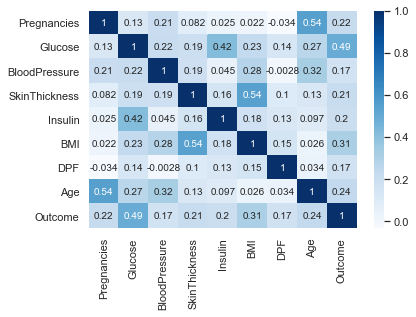

In [97]:
#Creating a heatmap for the entirety of the dataset
heat = diabetes[diabetes.columns].corr()
sns.heatmap(heat, annot = True,cmap='Blues')

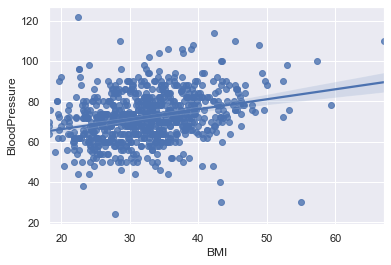

In [84]:
#Creating linear plots for select data of interest
sns.regplot(x="BMI", y="BloodPressure", data=diabetes);

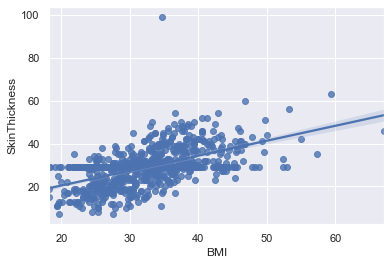

In [85]:
sns.regplot(x="BMI", y="SkinThickness", data=diabetes);

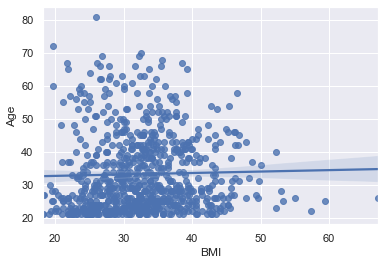

In [86]:
sns.regplot(x="BMI", y="Age", data=diabetes);

In [87]:
#Creating linear regression model
x = diabetes[['BloodPressure', 'SkinThickness']]
y = diabetes['BMI'] 

In [89]:
regr = linear_model.LinearRegression()
regr.fit(x, y) 

LinearRegression()

In [81]:
regr.predict([[0, 23]])

array([29.04055376])

In [52]:
regr.coef_

array([0.1044357 , 0.39724451])

In [88]:
from sklearn import linear_model 

In [90]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [91]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [92]:
y_prediction =  LR.predict(x_test)
y_prediction

array([32.86701379, 34.07038775, 31.68106461, 33.22930848, 34.1969609 ,
       33.78009202, 25.27483399, 32.49439429, 32.45518654, 33.035778  ,
       31.37838574, 35.56405743, 30.41073332, 27.79073029, 29.77556768,
       35.18433796, 33.78009202, 31.62649042, 32.49439429, 30.45292437,
       32.64871703, 33.035778  , 43.4960655 , 30.79779429, 32.40061235,
       35.38291008, 30.41073332, 25.14091934, 36.90134604, 26.90745997,
       44.76639679, 33.035778  , 37.45212958, 32.49439429, 34.39049139,
       35.24395379, 63.17611714, 34.44506558, 27.7361561 , 32.49439429,
       28.00902704, 30.71341218, 31.4205768 , 32.45518654, 34.39049139,
       35.93369362, 40.40461939, 34.22172718, 32.45518654, 34.36068347,
       28.68638374, 36.21160621, 39.60573118, 32.26165606, 26.18791222,
       31.62649042, 32.26165606, 32.49439429, 33.58656153, 31.68106461,
       34.36068347, 31.37838574, 24.48098742, 21.77156064, 34.30610928,
       44.75401365, 28.20255753, 35.93873527, 32.84224751, 40.90

In [93]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.20836119666676822
mean_sqrd_error is== 34.62429748759477
root_mean_squared error of is== 5.88424145388297


In [80]:
#Creating two way anova
anova = pg.anova(diabetes, dv='BMI', between=['BloodPressure', 'SkinThickness'], detailed=False)
anova

C:\Users\crook\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 46, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\crook\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 49, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\crook\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2254, but rank is 419
  warnings.warn('covariance of constraints does not have full '


Source            SS      DF           MS  \
0                  BloodPressure  5.200128e+03    46.0   113.046252   
1                  SkinThickness  2.704861e+03    49.0    55.201246   
2  BloodPressure * SkinThickness  4.487981e+06  2254.0  1991.118258   
3                       Residual  1.094159e+04   349.0    31.351275   

           F          p-unc       np2  
0   3.605794   2.818274e-02  0.322154  
1   1.760734   1.734424e-01  0.198210  
2  63.509962  4.368037e-218  0.997568  
3        NaN            NaN       NaN